In [2]:
from uncertainties import ufloat
from uncertainties.umath import *
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import LombScargle
from scipy import signal
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.optimize
import glob
from astropy.table import Table,join,vstack,unique
from importlib import reload
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sb
import scipy.stats as st
import wotan

import ogle as o #module

blue = 'cornflowerblue'
navy = 'navy'
purple = 'rebeccapurple'
pink = '#CF6275'
maroon = 'maroon'

cross = Table.read('sourcefiles.csv')
full = Table.read('smc_x_m03_zar_match_OGLE_v2.ascii',format='ascii')
summ = pd.read_csv('summtab.csv')
phase = pd.read_csv('phasetab.csv')
cross2 = Table.read('part2files.csv')
cross2 = join(cross2,full,keys='src_n')

# Optical Period of Sources with Known Orbital from X-ray
- to do: identify other sources with X-ray orbital periods

# 1. Shapes of Phase-Fold when Period from X-ray

### 7: known period of 21.9 but previously found 24.8 better
- look for aliases
- shape of 21.9 fold

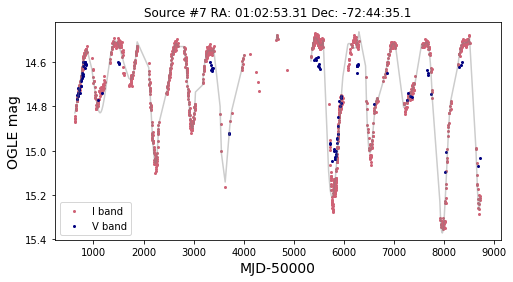

In [9]:
iband,vband = o.getIV(7,cross,stack=True,plot=True)
flatten, trend = wotan.flatten(iband['MJD-50000'],iband['I mag'],method='rspline',window_length=200,break_tolerance=100,return_trend=True)
plt.plot(iband['MJD-50000'],trend,color='grey',alpha=0.4)

In [10]:
o.splinedetrend(iband,window=200,btol=100)

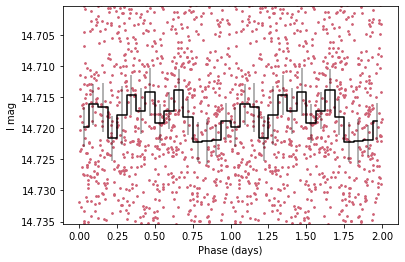

In [48]:
pd = 21.9
o.phasestep(iband,pd,16,det=True,divide=True)
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I detrend'],color=pink,s=3)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I detrend'],color=pink,s=3)

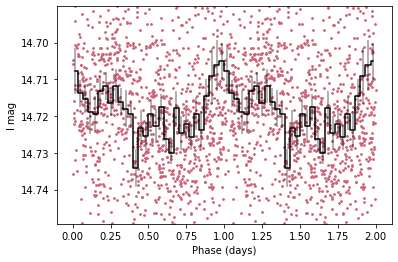

In [50]:
pd = 24.79
o.phasestep(iband,pd,30,det=True,divide=True)
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I detrend'],color=pink,s=3)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I detrend'],color=pink,s=3)

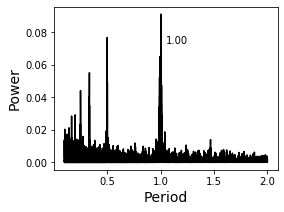

In [27]:
freq,power,bp = o.periodogram(iband,more=True,det=True,minp=0.1,maxp=2)
pf = o.findpeaks(freq,power,pkorder=True)

In [28]:
len(pf)

16

In [29]:
o.aliasarr(pf['period'])

array([[2.18792666e+02, 2.39494133e+02, 2.64522401e+02, 3.16145342e+02,
        1.69171825e+02, 1.53175813e+02, 1.44952252e+02, 1.03871585e+02,
        1.00417321e+00, 1.00182582e+00, 1.00142946e+00, 1.00103342e+00,
        9.90469525e-01, 5.00358385e-01, 5.00259495e-01, 4.99666979e-01],
       [5.01145251e-01, 5.01046051e-01, 5.00946889e-01, 5.00792028e-01,
        4.98526567e-01, 4.98373199e-01, 4.98281223e-01, 4.97604712e-01,
        3.33795737e-01, 3.33535955e-01, 3.33492011e-01, 3.33448078e-01,
        3.32267620e-01, 2.50089564e-01, 2.50064857e-01, 2.49916717e-01]])

In [36]:
reload(o)
o.findbeat(21.9,218.79)

24.33592869114734

## 64: Carpano et al. 2017
- summary: period known from X-ray; makes sinusoidal profile even with other numbers within error
    - alias of low period gets very close but not exactly this period

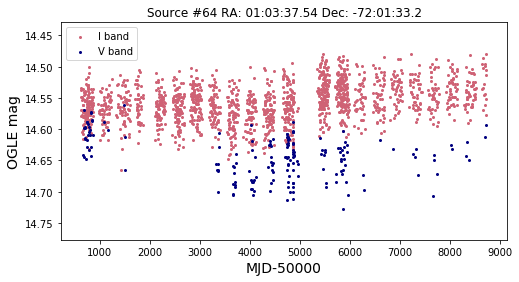

In [52]:
iband,vband = o.getIV(64,cross,stack=True,plot=True)

In [54]:
o.splinedetrend(iband,window=300)

26.17077112072268


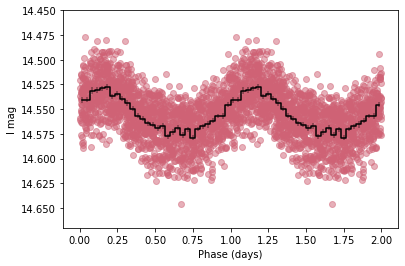

In [61]:
#phase-fold with best period
bp = o.periodogram(iband,minp=5,maxp=200,plot=False)
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,30,det=True,divide=True)

plt.ylim(14.67,14.45)
print(bp)

26.188


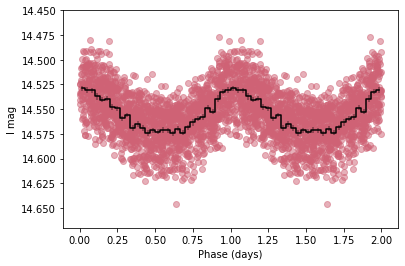

In [76]:
#phase-fold with best period
bp = 26.188 #Carpano X-ray period 26.188±0.045
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,30,det=True,divide=True)

plt.ylim(14.67,14.45)
print(bp)

shows sinusoidal doesn't rule out orbital, just need to check alias (below)

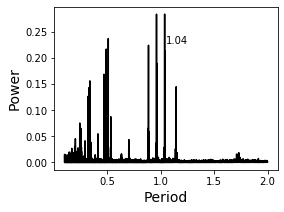

In [77]:
freq,power,bp = o.periodogram(iband,more=True,det=True,minp=0.1,maxp=2)
pf = o.findpeaks(freq,power,pkorder=True)

In [82]:
pf['period'][2]

1.039717496773951

In [78]:
o.aliasarr(pf['period']) #close but none are exact

array([[ 7.90986966,  8.08515049, 26.17782039, 28.20120344, 26.17203729,
        24.42031305,  7.90856933,  7.74078178,  7.58067526,  1.14114535,
         1.03676728,  1.03382958,  0.96066499,  0.95814221,  0.88558714,
         0.88345247,  0.70067844,  0.5090237 ,  0.50831454,  0.50761053,
         0.48930984,  0.48865451,  0.46905828,  0.46845874,  0.33700735,
         0.33669776,  0.33638733,  0.32825288,  0.31901178],
       [ 0.53373879,  0.53295914,  0.50973603,  0.50902488,  0.49062689,
         0.48996802,  0.47026843,  0.46966307,  0.46906199,  0.34766736,
         0.33732085,  0.33700927,  0.32884508,  0.32854896,  0.31957107,
         0.31929267,  0.29178438,  0.25223575,  0.25206149,  0.25188826,
         0.24729858,  0.24713108,  0.24201758,  0.24185787,  0.20131684,
         0.20120632,  0.20109543,  0.19815982,  0.19475408]])

In [84]:
o.aliasarr([1.039717496773951])

array([[26.17782039],
       [ 0.50973603]])

but aliasing from known period too; aliasing can go either way

1.039717496773951


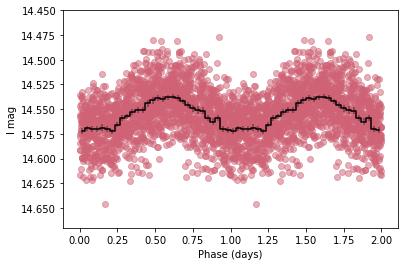

In [83]:
bp = 1.039717496773951 #alias of correct period
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,30,det=True,divide=True)

plt.ylim(14.67,14.45)
print(bp)

In [88]:
summ[summ['est. period method']=='X-ray']

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,V-I transition,Type II amp,note,I skew,I kurtosis,V skew,V kurtosis,best auto det pd,Part,I IQR
5,6,14.259583,-72.43188,5.05,0.5,17.13,0.902515,SXP 5.05,15.905905,0.095154,...,yes,0.3,changed est. 17.2 to 17.13,-1.266705,0.786946,-1.381626,0.596449,17.347929,1.0,0.092
6,7,15.722455,-72.74299,6.85,0.5,21.90,0.421283,NaN,14.721636,0.219999,...,NaN,NaN,3 epochs,1.011883,0.099615,0.927689,-0.508443,23.961722,1.0,0.295


In [86]:
summ.columns


Index(['src_n', 'ra_deg', 'dec_deg', 'spin period', 'perr', 'est. period',
       'sep', 'name', 'mean I', 'stdev I', 'max I', 'min I', 'I range',
       'mean V', 'stdev V', 'max V', 'min V', 'V range', 'est. period method',
       'best period', 'best superorbital', 'other period', 'period shape',
       'big dip', 'orbital cont', 'superorbital cont', 'mult superorbital',
       'changing superorbital amp', 'redder when brighter', 'I V-I corr',
       'V V-I corr', 'I V-I slope', 'I V-I int', 'V V-I slope', 'V V-I int',
       'V-I transition', 'Type II amp', 'note', 'I skew', 'I kurtosis',
       'V skew', 'V kurtosis', 'best auto det pd', 'Part', 'I IQR'],
      dtype='object')

## 6: SXP 5.05 with orbital 17.13

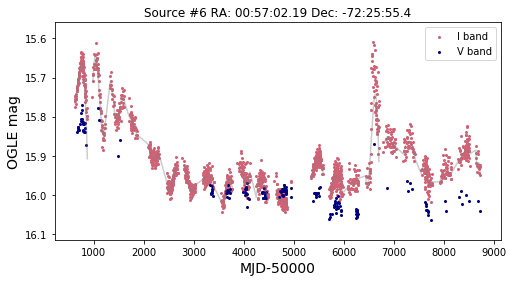

In [93]:
iband,vband = o.getIV(6,cross,stack=True,plot=True)
flatten, trend = wotan.flatten(iband['MJD-50000'],iband['I mag'],method='rspline',window_length=100,break_tolerance=20,return_trend=True)
plt.plot(iband['MJD-50000'],trend,color='grey',alpha=0.4)

In [94]:
o.splinedetrend(iband,window=100,btol=20)

17.344983491530225


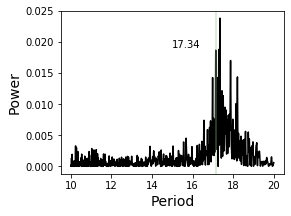

In [97]:
bp = o.periodogram(iband,det=True,minp=10,maxp=20)
plt.axvline(17.13,color='darkseagreen',alpha=0.4)
print(bp)

17.344983491530225


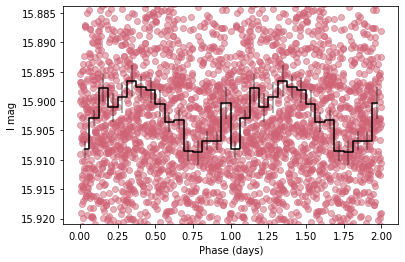

In [99]:
#phase-fold with best period
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,16,det=True,divide=True)

print(bp)

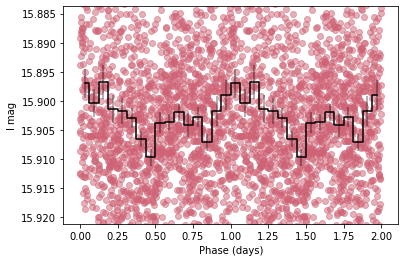

In [100]:
bp = 17.13
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,16,det=True,divide=True)

still decent shape but not FRED

# 27: X-ray outburst pattern of 362.3±4.1 d
- to do: see if more recent X-ray observations

In [109]:
summ[summ['spin period']==82.4]

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,V-I transition,Type II amp,note,I skew,I kurtosis,V skew,V kurtosis,best auto det pd,Part,I IQR
25,27,13.037084,-72.63416,82.4,0.6,362.3,0.333036,NaN,15.115796,0.292898,...,NaN,NaN,NaN,0.079026,-1.602477,0.215941,-1.55104,326.153217,1.0,0.6


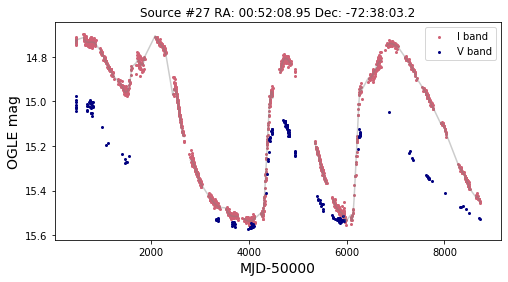

In [112]:
iband,vband = o.getIV(27,cross,stack=True,plot=True)
flatten, trend = wotan.flatten(iband['MJD-50000'],iband['I mag'],method='rspline',window_length=100,break_tolerance=20,return_trend=True)
plt.plot(iband['MJD-50000'],trend,color='grey',alpha=0.4)

In [113]:
o.splinedetrend(iband,window=100,btol=20)

<Quantity 361.49286883>

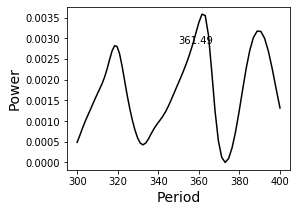

In [114]:
o.periodogram(iband,det=True,minp=300,maxp=400)

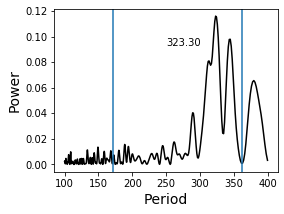

In [121]:
o.periodogram(iband,det=False,minp=100,maxp=400)
plt.axvline(362)
plt.axvline(171)

In [123]:
o.findbeat(171.1,362.3)

324.2130230125523

very low power, but does nearly identify the X-ray outburst period

not seeing high power at 171 days as claimed, but beat periods here: 171, 362, and the maximum without detrending of 323

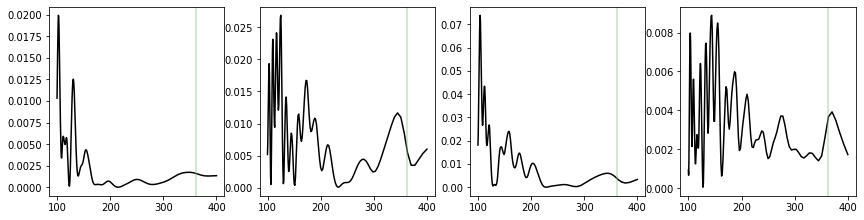

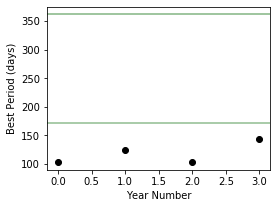

In [131]:
#check by 1000 days at a time
yrs = o.yrpd(iband,det=True,minp=100,maxp=400,orb=362,plotpd=True,spline=True,plotbest=True,sects=2000) #use plotpd --> often low power at 362
plt.axhline(171,color='darkseagreen')
plt.axhline(363,color='darkseagreen')

also difficult to get period around there b/c of window function

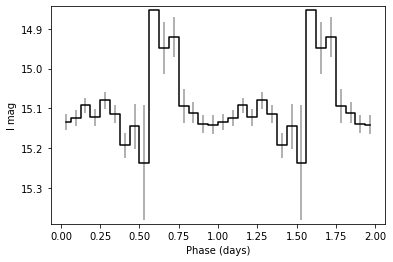

In [140]:
bp = 362.3
# plt.scatter((iband['MJD-50000']%bp)/bp,iband['I mag'],color=pink,alpha=0.5)
# plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I mag'],color=pink,alpha=0.5)
o.phasestep(iband,bp,16,det=False,divide=True)

- notice how fold looks quite good but not identified in periodogram
    - 323 peak does look very good/sinusoidal
- this one does have good FRED shape, though that's not being well-identified below 
- skew and kurtosis would identify it in FRED trend

In [136]:
o.combine(27,cross,full,iband=iband,pd=362.3,pbins=16,det=False,close=True,testbins=False)

{'period': 362.3,
 'amp': 0.3816000000000006,
 'phase diff': 0.9375,
 'phase max': 0.53125,
 'phase min': 0.59375,
 'shape': 'not FRED',
 'diff mean': 0.14543491425410127,
 'mean': 15.090165085745898,
 'skew': -1.1224314128380566,
 'kurtosis': 0.5417078351073554,
 'symm sum': 0.05509979072459613,
 'mean err': 0.03649987706353769}

## 2: SXP 2.16; look for 82.5 ± 0.7

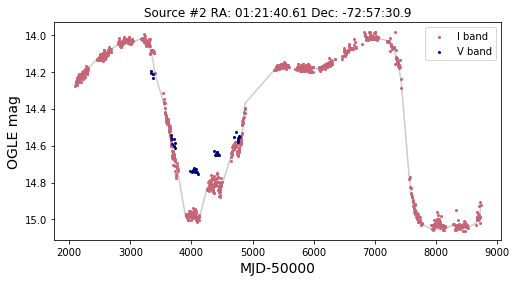

In [143]:
iband,vband = o.getIV(2,cross,stack=True,plot=True)
flatten, trend = wotan.flatten(iband['MJD-50000'],iband['I mag'],method='rspline',window_length=100,break_tolerance=20,return_trend=True)
plt.plot(iband['MJD-50000'],trend,color='grey',alpha=0.4)

In [144]:
o.splinedetrend(iband,window=100,btol=20)

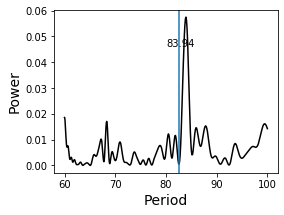

In [156]:
bp = o.periodogram(iband,det=True,minp=60,maxp=100)
plt.axvline(82.5)#uncertainty does not overlap peak here

83.94400147117449


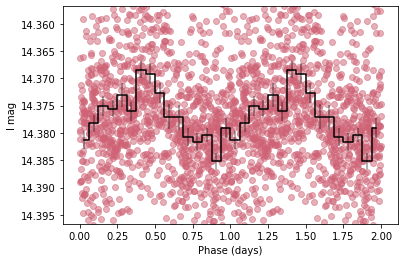

In [157]:
#best optical period (from periodogram above)
print(bp)
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,16,det=True,divide=True)

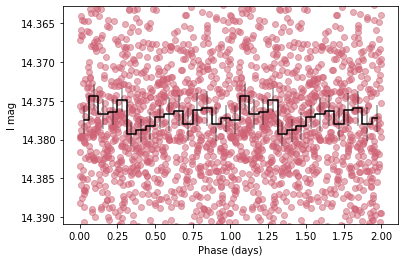

In [154]:
#X-ray period --> nothing
bp = 82.5
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,16,det=True,divide=True)

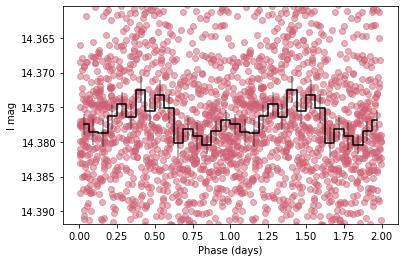

In [155]:
#X-ray period 2 --> better here
bp = 81.78
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,16,det=True,divide=True)